In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('../2023_Data_Mining_Brain_cancer_Dataset/dataset/Brain_GSE50161.csv')
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,898.500000,12.276393,8.769583,7.722634,9.160209,4.842069,7.968388,6.800111,6.472452,6.068968,...,12.371075,11.812911,13.793913,13.619041,5.206208,4.811666,3.916795,3.701539,4.627912,4.633377
std,37.671829,0.790160,0.673396,1.037339,0.615369,0.922003,0.630260,0.537431,0.659847,0.904152,...,0.609813,0.618190,0.320124,0.309078,0.220767,0.219851,0.165917,0.180251,0.160663,0.192353
min,834.000000,10.156207,6.627878,6.222515,8.044421,3.682762,6.560920,5.910571,5.515079,4.491771,...,9.979005,9.926470,12.719785,12.777792,4.680072,4.247758,3.530287,3.432622,4.278812,4.050006
25%,866.250000,11.679721,8.378760,7.007678,8.595505,4.207043,7.533713,6.389605,5.935051,5.462356,...,12.056825,11.359850,13.605871,13.392790,5.031176,4.684169,3.807447,3.589381,4.530391,4.519694
50%,898.500000,12.502518,8.786242,7.521674,9.194487,4.462729,7.915062,6.654785,6.401447,5.856087,...,12.415320,11.768853,13.774338,13.614493,5.214618,4.785318,3.912025,3.674620,4.607167,4.603287
75%,930.750000,12.883374,9.211098,8.249157,9.707397,5.276685,8.385912,7.143818,6.985782,6.476124,...,12.757924,12.230375,13.969533,13.813191,5.324326,4.950025,4.009166,3.744824,4.718997,4.736634
max,963.000000,13.655639,10.716003,12.054143,10.407136,7.404503,10.164655,8.110006,8.812959,8.646862,...,13.480002,13.022222,14.476079,14.273778,5.904952,5.619512,4.547821,4.854368,5.420217,5.436919


In [4]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


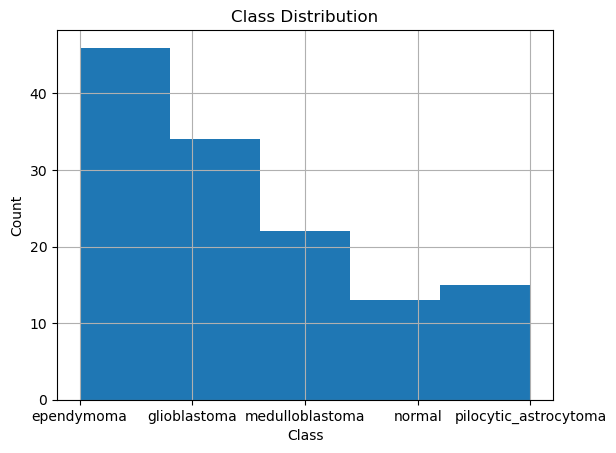

In [5]:
# Plot a histogram of the class distribution
df['type'].hist(bins=len(df['type'].unique()))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [25]:
X = df.drop('type', axis=1)
y = df['type']
X.head()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [7]:
pca = PCA()
scaler = StandardScaler()

In [8]:
X_transformed = scaler.fit_transform(X)

In [9]:
X_pca = pca.fit_transform(X_transformed)

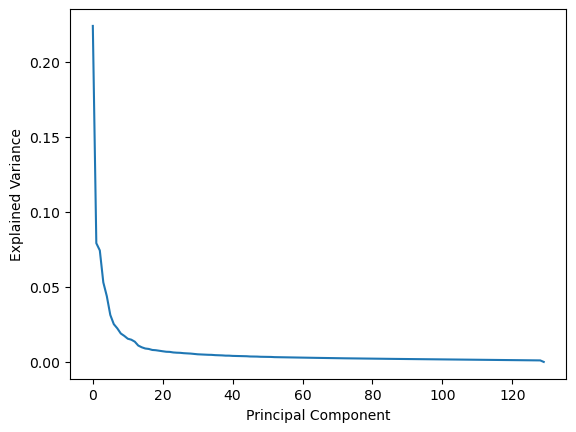

In [10]:
import numpy as np
explained_variance = pca.explained_variance_ratio_

# Print the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
#print(cumulative_variance)

# Plot the explained variance
import matplotlib.pyplot as plt
plt.plot(explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [11]:
pca.components_.shape

(130, 54676)

In [12]:
pca_names = [f'pca_{i}' for i in range(130)]

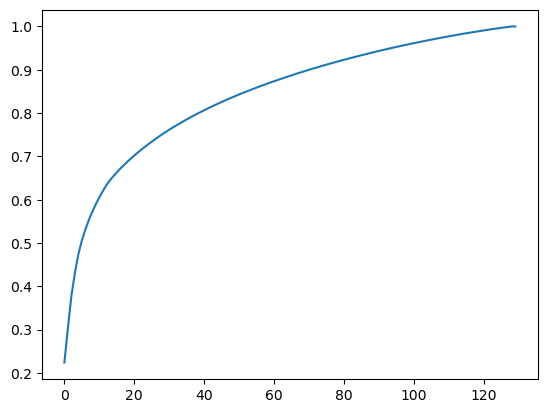

In [13]:
plt.plot(cumulative_variance)

In [14]:
cumulative_variance.shape

(130,)

In [15]:
pca.components_

array([[-1.79834202e-03,  2.32537262e-03, -3.88644892e-03, ...,
        -3.14912032e-03, -4.81653262e-03, -2.64167110e-04],
       [ 8.73233354e-03, -1.18275779e-02, -1.72289093e-03, ...,
         4.08616036e-03,  2.54223715e-03,  5.49642441e-03],
       [-1.22235179e-04,  2.98587864e-03, -7.24877093e-03, ...,
         6.47649544e-03,  9.15383814e-04,  6.11312038e-03],
       ...,
       [-3.86386148e-03, -8.89787522e-04, -3.01872962e-03, ...,
        -1.01592471e-03,  1.73523044e-03,  4.28356710e-03],
       [ 7.19887366e-03, -2.22133358e-03, -1.15254552e-04, ...,
         4.30621838e-03,  1.48343536e-03, -1.56480810e-03],
       [ 3.21047237e-01, -2.38323781e-01, -1.14736476e-01, ...,
        -1.43154909e-04,  5.27880374e-04,  3.07392236e-04]])

In [16]:
df_pca = pd.DataFrame(X_pca, columns = pca_names)

In [17]:
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_120,pca_121,pca_122,pca_123,pca_124,pca_125,pca_126,pca_127,pca_128,pca_129
0,165.165991,5.212315,87.729770,97.133217,10.793766,92.590042,48.005147,-54.521575,-25.038693,-36.333585,...,-0.848627,1.057461,1.740570,1.145848,3.204660,-1.475574,1.093115,-5.284324,1.042111,7.040958e-14
1,85.230165,-53.114200,-66.330151,19.645896,55.698062,-42.418905,1.959605,-9.058368,44.351064,37.604104,...,1.587482,2.722453,0.361879,-1.114696,-0.624423,0.124339,-2.538694,2.317628,1.691132,7.040958e-14
2,70.272422,-68.301485,-4.754802,-10.840544,21.795675,-35.197383,-14.721243,23.240242,15.117538,-2.214593,...,-14.798810,-11.520043,-8.381769,-0.928045,-3.064305,-26.299936,-13.449830,-0.611838,-2.941493,7.040958e-14
3,-101.584497,-47.693978,-18.942635,48.924392,16.731158,18.904039,-54.274957,-28.681224,17.470111,-3.928614,...,0.379218,0.914929,0.469855,-0.855273,-0.651115,0.373406,-0.978097,1.694363,1.086694,7.040958e-14
4,65.810737,-55.942478,2.937329,54.461048,13.336719,13.244394,66.080526,-7.007976,17.349431,-42.891114,...,3.044968,2.430194,-3.822431,-2.765943,1.174299,0.924991,-0.996460,0.325864,-0.884223,7.040958e-14


In [18]:
X_pca.shape

(130, 130)

In [19]:
X.shape

(130, 54676)

In [23]:
pca.n_components_

130

In [21]:
pca.explained_variance_ratio_.shape

(130,)

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size = 0.3, random_state=22,stratify=y)

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [32]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'ependymoma': 32, 'glioblastoma': 24, 'medulloblastoma': 15, 'pilocytic_astrocytoma': 11, 'normal': 9})
After SMOTE : Counter({'glioblastoma': 32, 'normal': 32, 'ependymoma': 32, 'pilocytic_astrocytoma': 32, 'medulloblastoma': 32})


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier()
model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [36]:
y_predict = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  f1_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8205128205128205


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,12,1,0,0,1
glioblastoma,0,7,0,0,3
medulloblastoma,0,0,7,0,0
normal,0,0,0,3,1
pilocytic_astrocytoma,1,0,0,0,3


In [45]:
model2 = KNeighborsClassifier()

In [46]:
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7948717948717948


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,13,0,0,0,1
glioblastoma,0,7,0,0,3
medulloblastoma,0,2,5,0,0
normal,0,0,0,3,1
pilocytic_astrocytoma,1,0,0,0,3


In [49]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3,random_state=10,stratify=y)

(91, 54676)

In [48]:
model3 = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7948717948717948


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,13,0,0,0,1
glioblastoma,0,8,0,0,2
medulloblastoma,2,1,4,0,0
normal,1,0,0,3,0
pilocytic_astrocytoma,0,1,0,0,3


In [62]:
from sklearn.tree import DecisionTreeClassifier,export_text
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size = 0.3, random_state=22,stratify=y)

In [63]:
model = DecisionTreeClassifier()

In [64]:
model.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [65]:
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7948717948717948


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,13,0,0,0,1
glioblastoma,0,7,0,0,3
medulloblastoma,0,0,7,0,0
normal,0,1,1,2,0
pilocytic_astrocytoma,0,1,1,0,2


In [112]:
from sklearn.svm import SVC

In [113]:
linear_model = SVC(kernel='linear')

In [114]:
linear_model.fit(X_train_smote,y_train_smote)
y_predict = linear_model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9487179487179487


col_0,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
type,,,,,
ependymoma,12,1,0,0,1
glioblastoma,0,10,0,0,0
medulloblastoma,0,0,7,0,0
normal,0,0,0,4,0
pilocytic_astrocytoma,0,0,0,0,4
